In [1]:
import os
import shutil
import random
import pandas as pd
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

import cv2
from tqdm import tqdm
# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")

In [2]:
# windows操作系统
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
# 指定数据集路径
dataset_path = 'machi5_full'

In [4]:
dataset_name = dataset_path.split('_')[0]
print('数据集', dataset_name)

数据集 machi5


In [5]:
classes = os.listdir(dataset_path)

In [6]:
len(classes)

5

In [7]:
classes

['Lv1', 'Lv2', 'lv3', 'lv4', 'lv5']

In [8]:
# 创建 train 文件夹
os.mkdir(os.path.join(dataset_path, 'train'))

# 创建 test 文件夹
os.mkdir(os.path.join(dataset_path, 'val'))

# 在 train 和 test 文件夹中创建各类别子文件夹
for fruit in classes:
    os.mkdir(os.path.join(dataset_path, 'train', fruit))
    os.mkdir(os.path.join(dataset_path, 'val', fruit))

In [9]:
test_frac = 0.05  # 测试集比例
random.seed(123) # 随机数种子，便于复现

In [10]:
df = pd.DataFrame()

print('{:^18} {:^18} {:^18}'.format('类别', '训练集数据个数', '测试集数据个数'))

for fruit in classes: # 遍历每个类别

    # 读取该类别的所有图像文件名
    old_dir = os.path.join(dataset_path, fruit)
    images_filename = os.listdir(old_dir)
    random.shuffle(images_filename) # 随机打乱
    # 划分训练集和测试集
    testset_numer = int(len(images_filename) * test_frac) # 测试集图像个数
    testset_images = images_filename[:testset_numer]      # 获取拟移动至 test 目录的测试集图像文件名
    trainset_images = images_filename[testset_numer:]     # 获取拟移动至 train 目录的训练集图像文件名

    # 移动图像至 test 目录
    for image in testset_images:
        old_img_path = os.path.join(dataset_path, fruit, image)         # 获取原始文件路径
        new_test_path = os.path.join(dataset_path, 'val', fruit, image) # 获取 test 目录的新文件路径
        shutil.move(old_img_path, new_test_path) # 移动文件

    # 移动图像至 train 目录
    for image in trainset_images:
        old_img_path = os.path.join(dataset_path, fruit, image)           # 获取原始文件路径
        new_train_path = os.path.join(dataset_path, 'train', fruit, image) # 获取 train 目录的新文件路径
        shutil.move(old_img_path, new_train_path) # 移动文件
    
    # 删除旧文件夹
    assert len(os.listdir(old_dir)) == 0 # 确保旧文件夹中的所有图像都被移动走
    shutil.rmtree(old_dir) # 删除文件夹
    
    # 工整地输出每一类别的数据个数
    print('{:^18} {:^18} {:^18}'.format(fruit, len(trainset_images), len(testset_images)))
    
    # 保存到表格中
    # 修改后的代码
    df = pd.concat([df, pd.DataFrame({'class':[fruit], 'trainset':[len(trainset_images)], 'testset':[len(testset_images)]})], ignore_index=True)

# 重命名数据集文件夹
shutil.move(dataset_path, dataset_name+'_split')

# 数据集各类别数量统计表格，导出为 csv 文件
df['total'] = df['trainset'] + df['testset']
df.to_csv('数据量统计.csv', index=False)

        类别              训练集数据个数            测试集数据个数      
       Lv1                118                 6         
       Lv2                237                 12        
       lv3                319                 16        
       lv4                103                 5         
       lv5                326                 17        


In [11]:
df

,class,trainset,testset,total
0,Lv1,118,6,124
1,Lv2,237,12,249
2,lv3,319,16,335
3,lv4,103,5,108
4,lv5,326,17,343


In [12]:
## 看看图片啥样

In [13]:
folder_path = 'machi5_split\\train\\Lv1'
# 可视化图像的个数
N = 25

In [14]:
# n 行 n 列
n = math.floor(np.sqrt(N))
n

5

In [15]:
images = []
for each_img in os.listdir(folder_path)[:N]:
    img_path = os.path.join(folder_path, each_img)
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    images.append(img_rgb)

len(images)

25

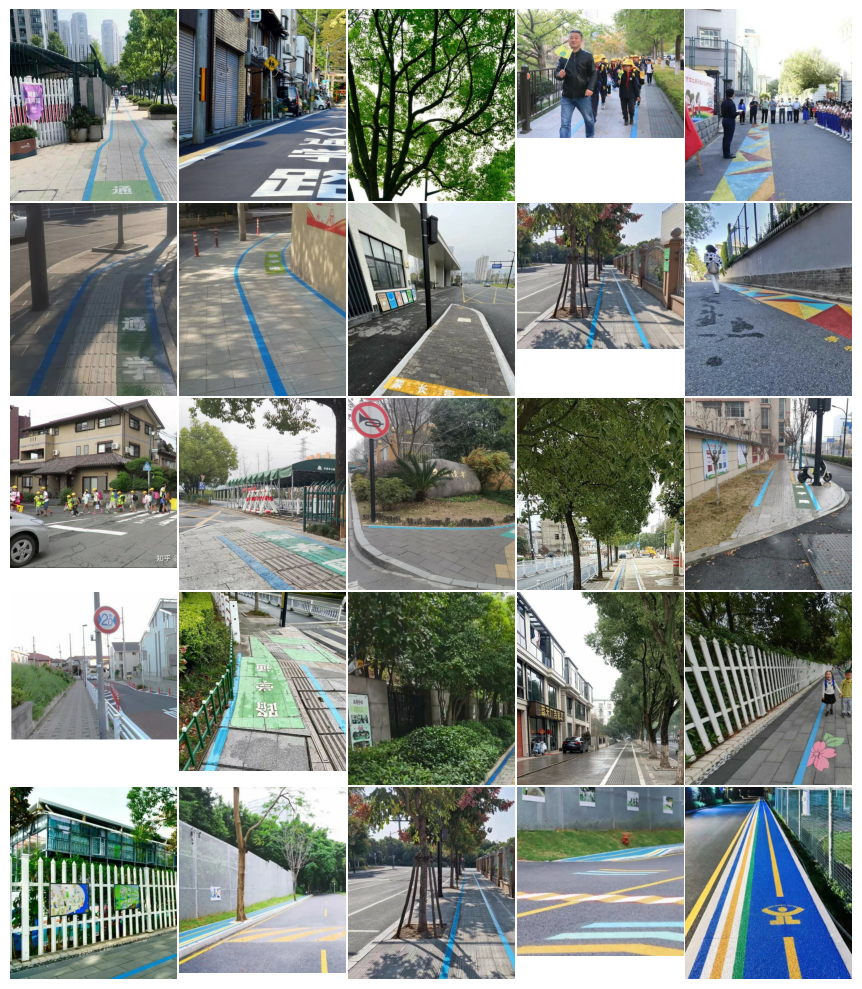

In [16]:
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # 类似绘制子图 subplot(111)
                 nrows_ncols=(n, n),  # 创建 n 行 m 列的 axes 网格
                 axes_pad=0.02,  # 网格间距
                 share_all=True
                 )

# 遍历每张图像
for ax, im in zip(grid, images):
    ax.imshow(im)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [17]:
df = pd.read_csv('数据量统计.csv')

In [18]:
df.shape

(5, 4)

In [19]:
df

,class,trainset,testset,total
0,Lv1,118,6,124
1,Lv2,237,12,249
2,lv3,319,16,335
3,lv4,103,5,108
4,lv5,326,17,343


In [20]:
# 指定可视化的特征
feature = 'total'
# feature = 'trainset'
# feature = 'testset'

In [21]:
df = df.sort_values(by=feature, ascending=False)
df.head()

,class,trainset,testset,total
4,lv5,326,17,343
2,lv3,319,16,335
1,Lv2,237,12,249
0,Lv1,118,6,124
3,lv4,103,5,108


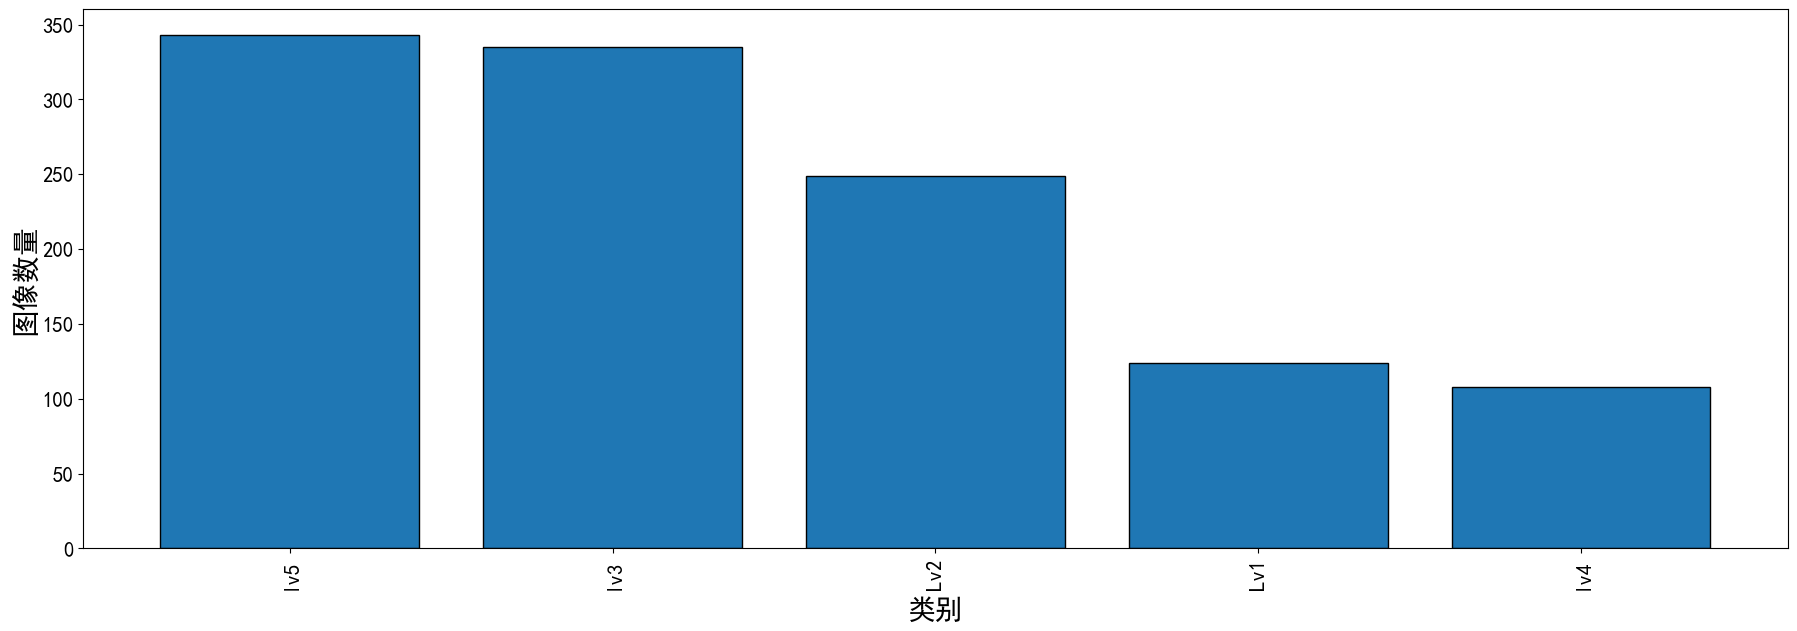

In [22]:
plt.figure(figsize=(22, 7))

x = df['class']
y = df[feature]

plt.bar(x, y, facecolor='#1f77b4', edgecolor='k')

plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.xlabel('类别', fontsize=20)
plt.ylabel('图像数量', fontsize=20)

# plt.savefig('各类别图片数量.pdf', dpi=120, bbox_inches='tight')

plt.show()

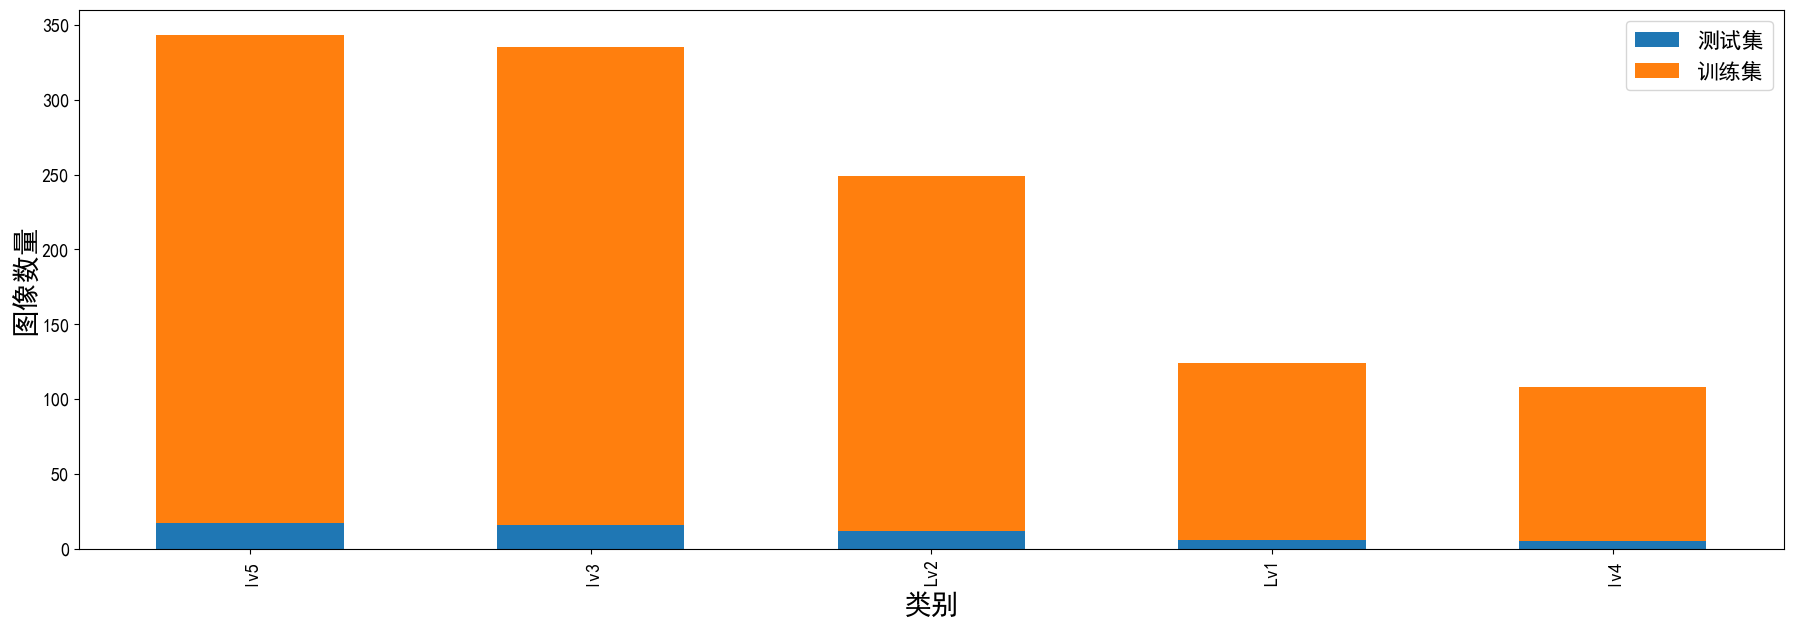

In [23]:
plt.figure(figsize=(22, 7))
x = df['class']
y1 = df['testset']
y2 = df['trainset']

width = 0.55 # 柱状图宽度

plt.xticks(rotation=90) # 横轴文字旋转

plt.bar(x, y1, width, label='测试集')
plt.bar(x, y2, width, label='训练集', bottom=y1)


plt.xlabel('类别', fontsize=20)
plt.ylabel('图像数量', fontsize=20)
plt.tick_params(labelsize=13) # 设置坐标文字大小

plt.legend(fontsize=16) # 图例

# 保存为高清的 pdf 文件
plt.savefig('各类别图像数量.pdf', dpi=120, bbox_inches='tight')

plt.show()